<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
df = pd.read_csv('weather_classification_data.csv')
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0               14        73         9.5                 82  partly cloudy   
1               39        96         8.5                 71  partly cloudy   
2               30        64         7.0                 16          clear   
3               38        83         1.5                 82          clear   
4               27        74        17.0                 66       overcast   
...            ...       ...         ...                ...            ...   
13195           10        74        14.5                 71       overcast   
13196           -1        76         3.5                 23         cloudy   
13197           30        77         5.5                 28       overcast   
13198            3        76        10.0                 94       overcast   
13199           -5        38         0.0                 92       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

In [6]:
df.shape


(13200, 11)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [9]:
df.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [10]:
# descriptive statistics of data
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [11]:
df.duplicated().sum()

0

# EDA

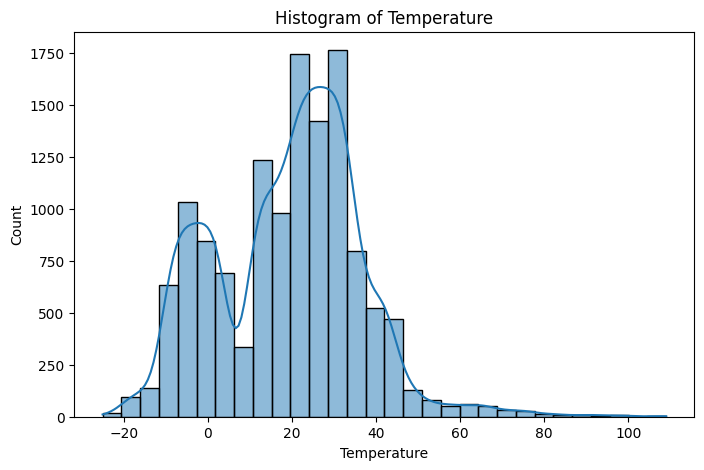

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title("Histogram of Temperature")
plt.show()

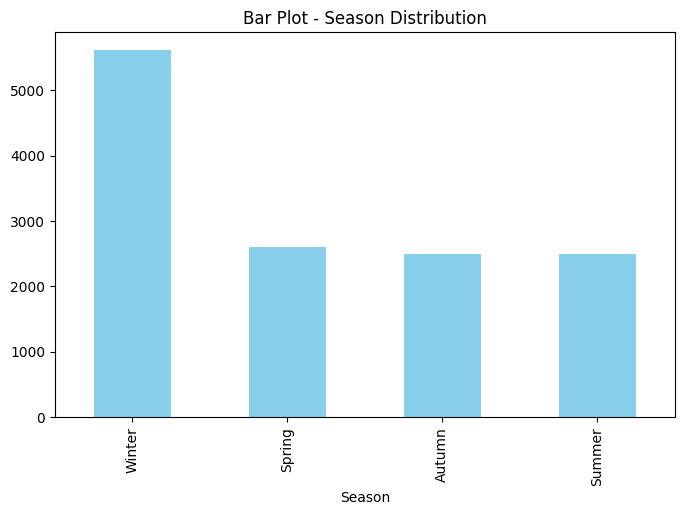

In [13]:
plt.figure(figsize=(8,5))
df['Season'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Bar Plot - Season Distribution")
plt.show()

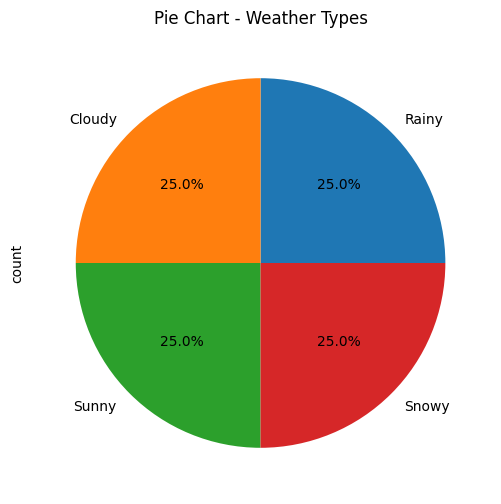

In [14]:
plt.figure(figsize=(6,6))
df['Weather Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart - Weather Types")
plt.show()

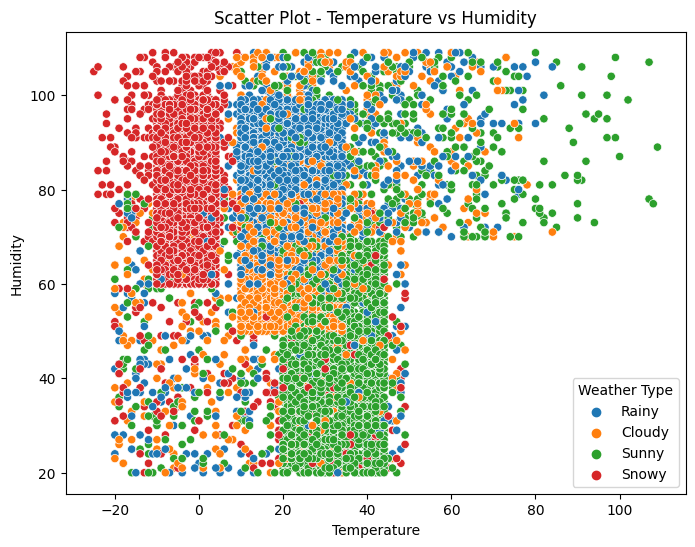

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Temperature', y='Humidity', hue='Weather Type')
plt.title("Scatter Plot - Temperature vs Humidity")
plt.show()

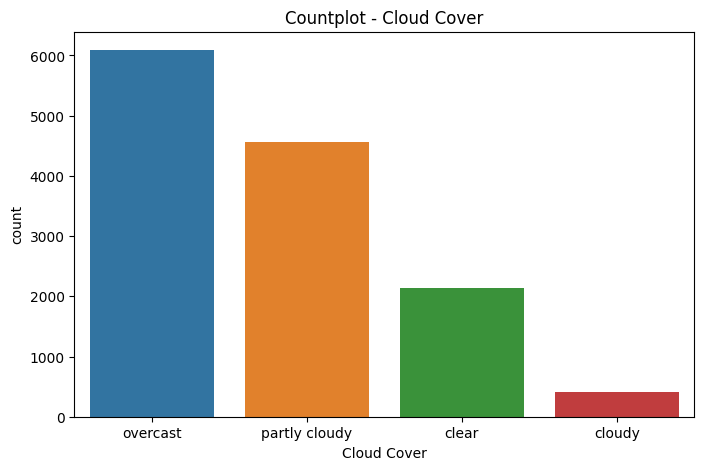

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Cloud Cover', order=df['Cloud Cover'].value_counts().index)
plt.title("Countplot - Cloud Cover")
plt.show()

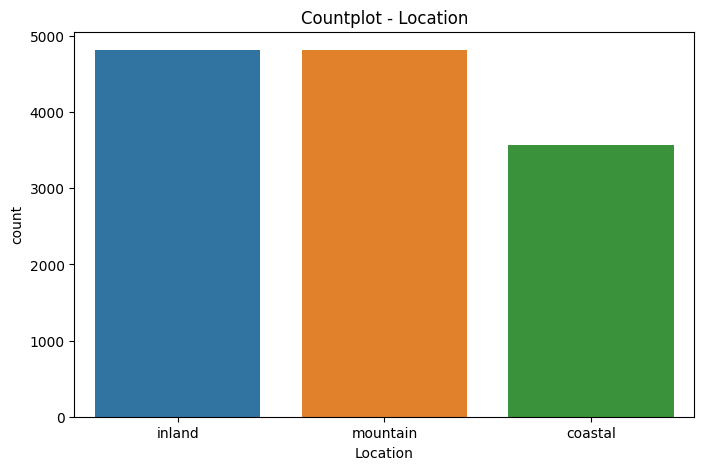

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title("Countplot - Location")
plt.show()

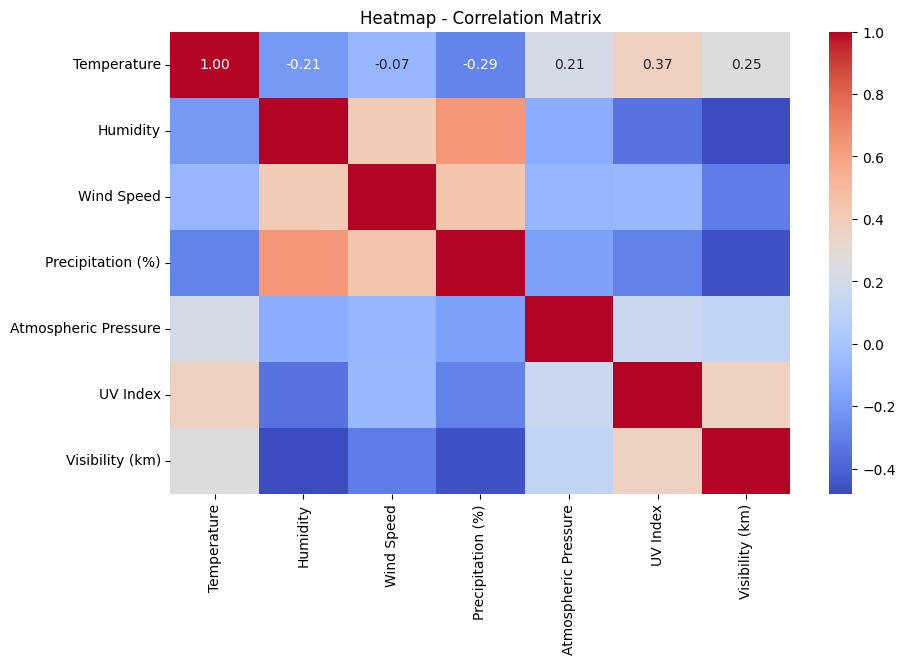

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap - Correlation Matrix")
plt.show()

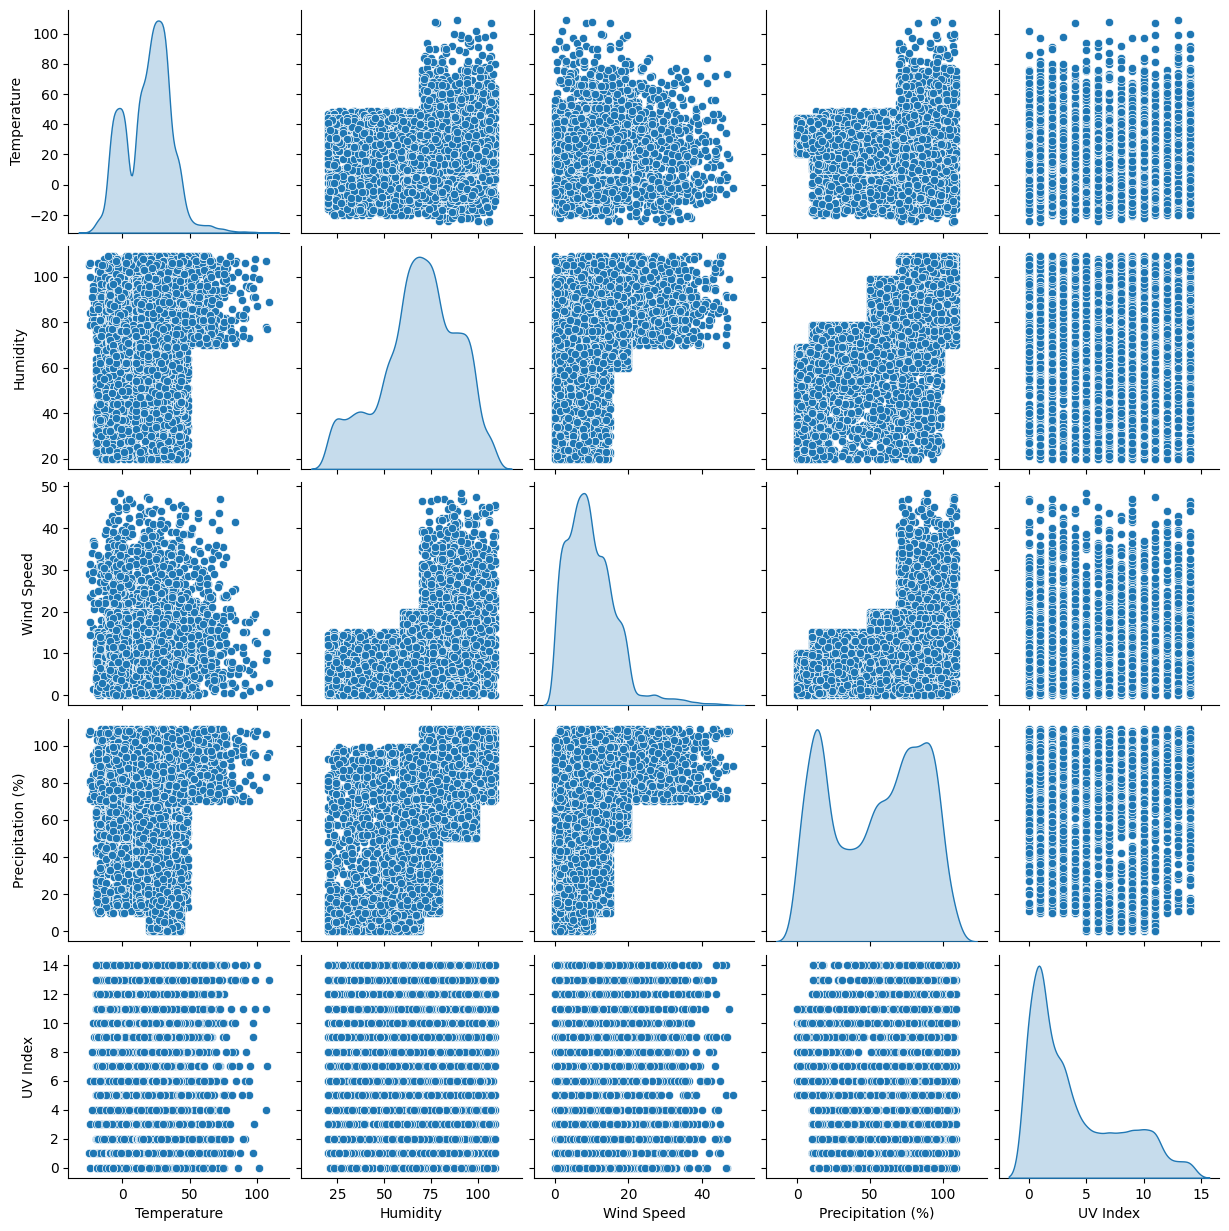

In [19]:
sns.pairplot(df[['Temperature','Humidity','Wind Speed','Precipitation (%)','UV Index']], diag_kind='kde')
plt.show()

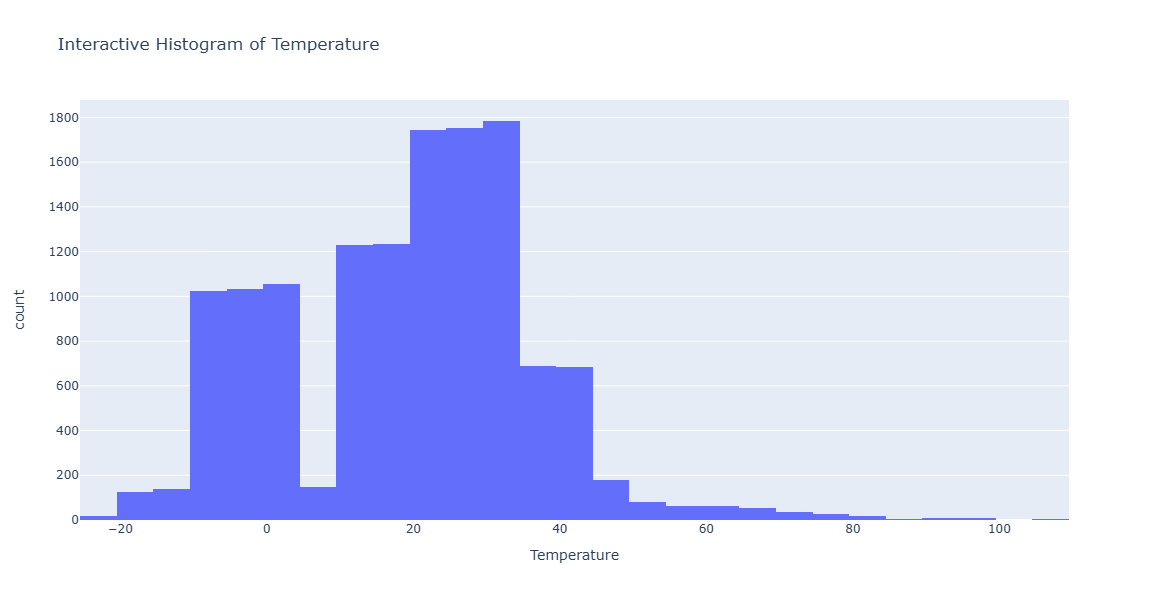

In [20]:
fig = px.histogram(df, x='Temperature', nbins=30, title='Interactive Histogram of Temperature', width=900, height=600)
fig.show()

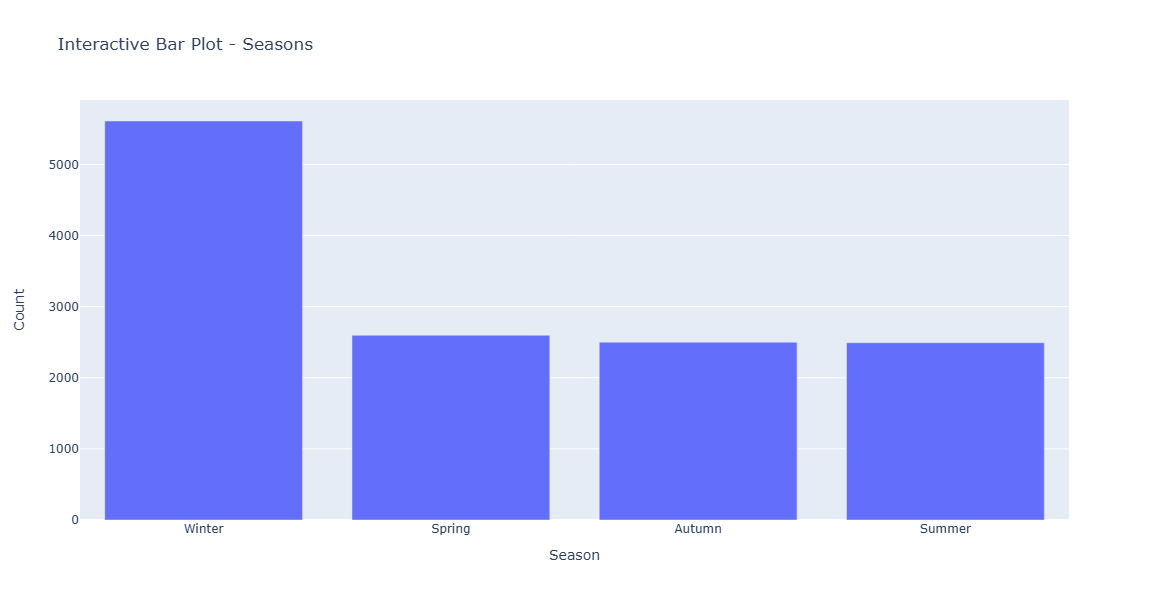

In [21]:
season_counts = df['Season'].value_counts().reset_index()
season_counts.columns = ['Season', 'Count']

fig = px.bar(season_counts, 
             x='Season', y='Count',
             title='Interactive Bar Plot - Seasons',
             width=900, height=600)
fig.show()

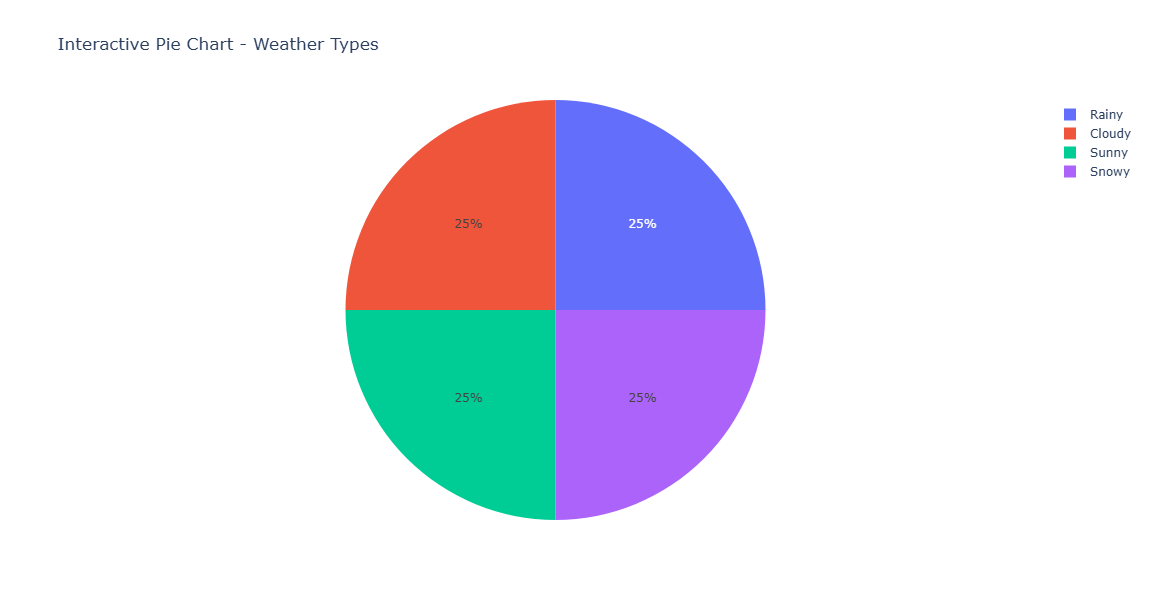

In [22]:
fig = px.pie(df, names='Weather Type', title='Interactive Pie Chart - Weather Types', width=800, height=600)
fig.show()

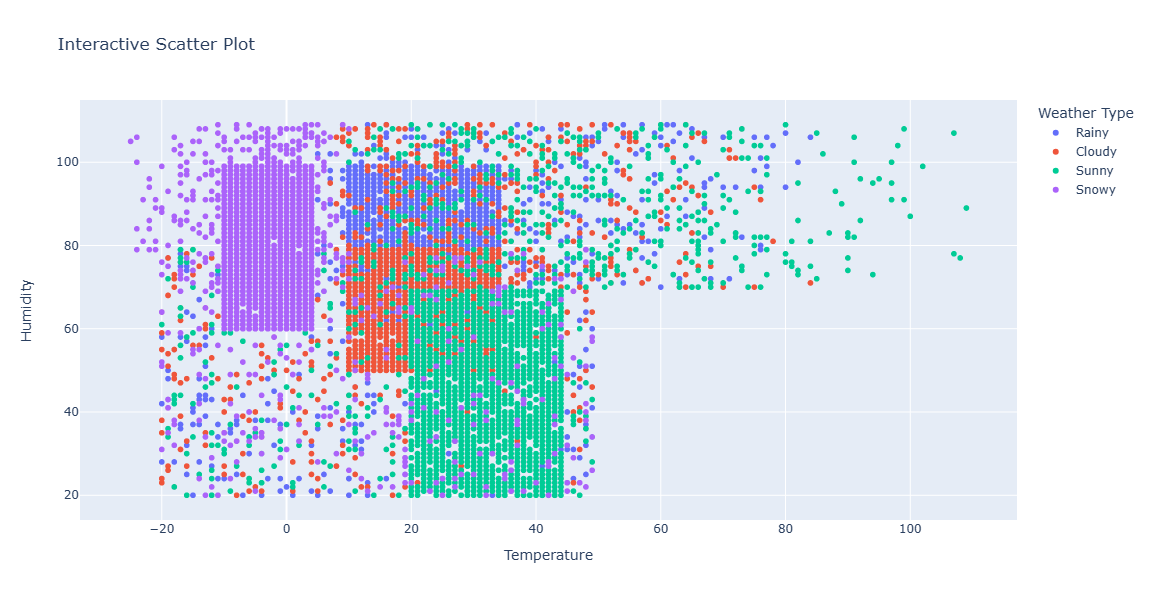

In [23]:
fig = px.scatter(df, x='Temperature', y='Humidity', color='Weather Type', title='Interactive Scatter Plot', width=900, height=600)
fig.show()

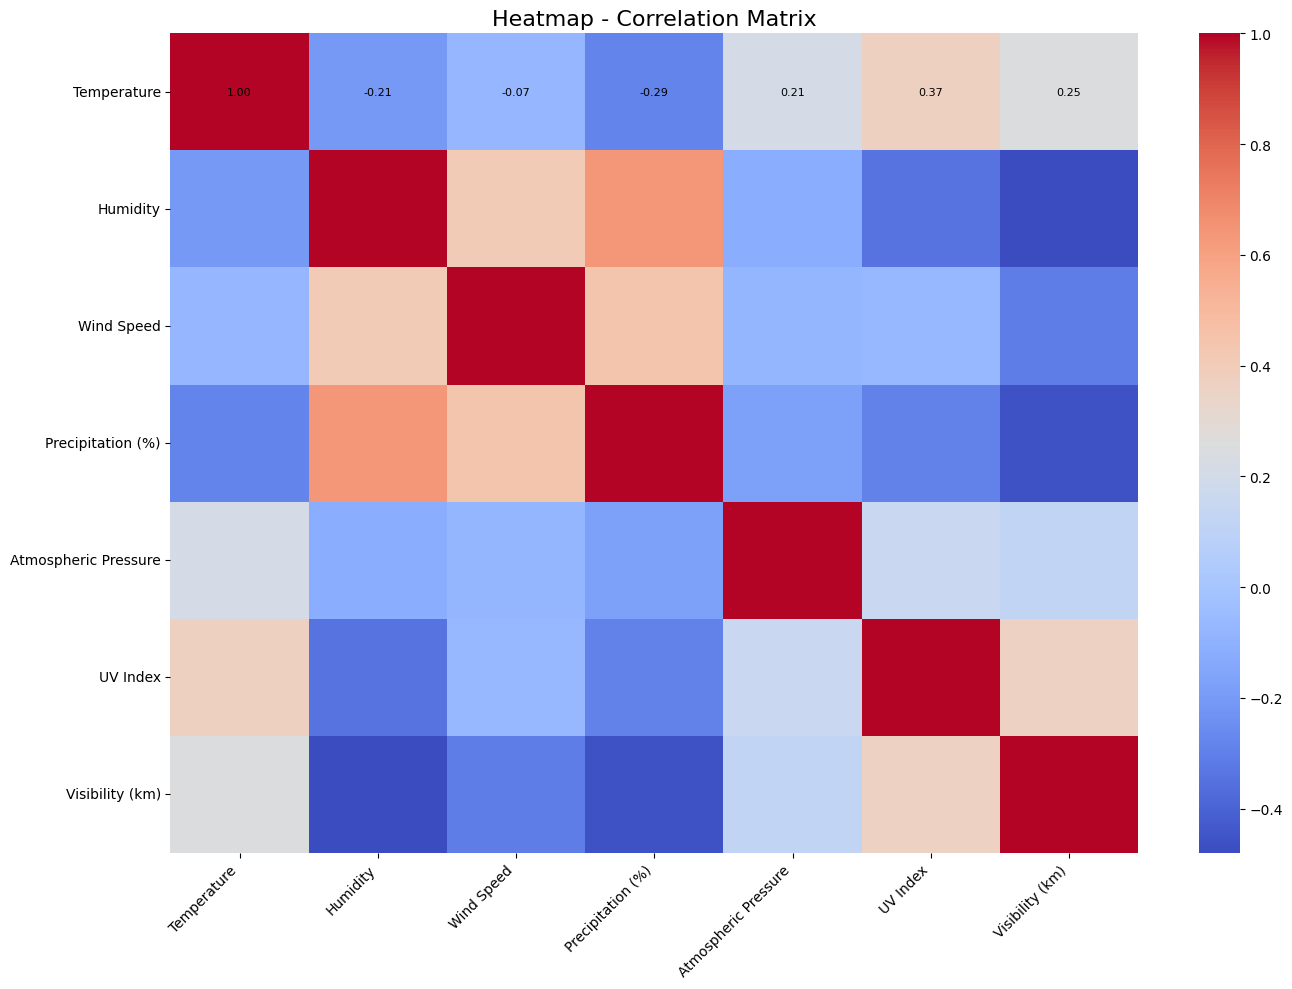

In [24]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))  # bigger chart

sns.heatmap(
    corr,
    annot=True,          # show numbers
    cmap="coolwarm",     # color map
    fmt=".2f",           # decimal format
    annot_kws={"size": 8, "color": "black"},  # smaller black text for readability
    cbar=True
)

plt.title("Heatmap - Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')  # rotate x labels to avoid overlap
plt.yticks(rotation=0)               # keep y labels horizontal
plt.tight_layout()
plt.show()

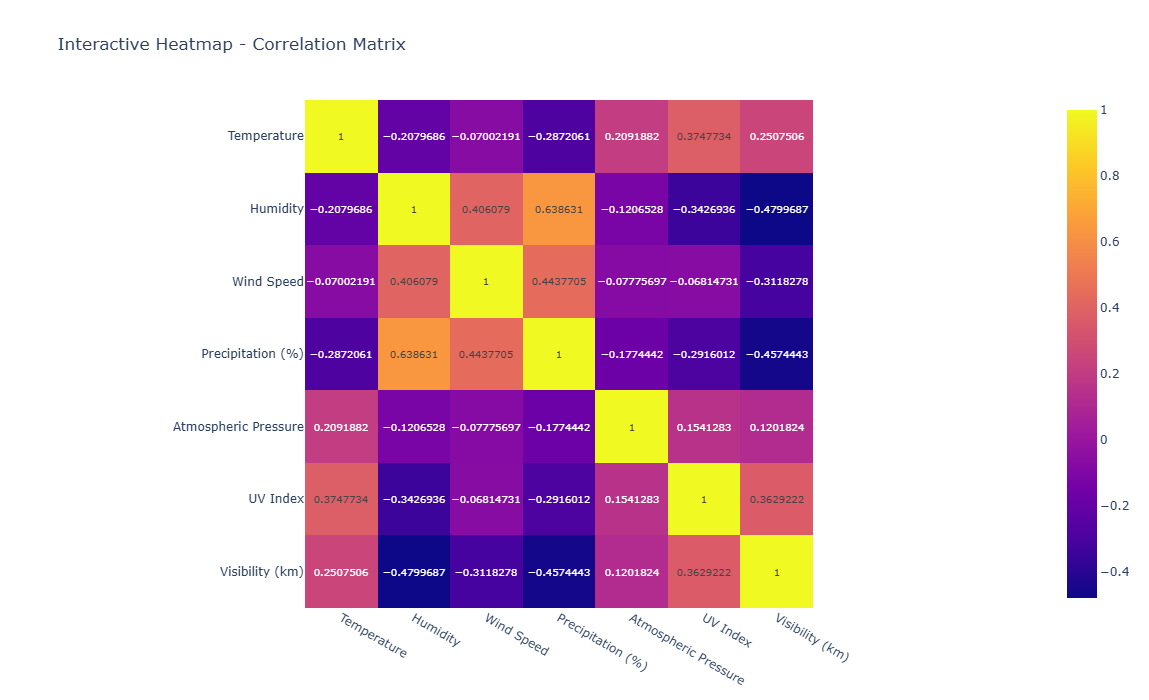

In [25]:
corr = df.corr(numeric_only=True)
fig = px.imshow(corr, text_auto=True, title='Interactive Heatmap - Correlation Matrix', width=900, height=700)
fig.show()

# Data Preprocessing

In [26]:
## GENDER 
df['Cloud Cover'].replace('clear',0, inplace=True)
df['Cloud Cover'].replace('cloudy',1, inplace=True)
df['Cloud Cover'].replace('overcast',2, inplace=True)
df['Cloud Cover'].replace('partly cloudy',3, inplace=True)

df['Season'].replace('Autumn',0, inplace=True)
df['Season'].replace('Spring',1, inplace=True)
df['Season'].replace('Summer',2, inplace=True)
df['Season'].replace('Winter',3, inplace=True)

df['Location'].replace('coastal',0, inplace=True)
df['Location'].replace('inland',1, inplace=True)
df['Location'].replace('mountain',2, inplace=True)

df['Weather Type'].replace('Cloudy',0, inplace=True)
df['Weather Type'].replace('Rainy',1, inplace=True)
df['Weather Type'].replace('Snowy',2, inplace=True)
df['Weather Type'].replace('Sunny',3, inplace=True)

In [27]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0           14        73         9.5                 82            3   
1           39        96         8.5                 71            3   
2           30        64         7.0                 16            0   
3           38        83         1.5                 82            0   
4           27        74        17.0                 66            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       3              3.5         1   
1               1011.43         7       1             10.0         1   
2               1018.72         5       1              5.5         2   
3               1026.25         7       1              1.0         0   
4                990.67         1       3              2.5         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.1 MB


In [29]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

        Cloud Cover  Atmospheric Pressure      UV Index        Season  \
count  13200.000000          13200.000000  13200.000000  13200.000000   
mean       1.990227           1005.827896      4.005758      1.849394   
std        1.012302             37.199589      3.856600      1.164824   
min        0.000000            800.120000      0.000000      0.000000   
25%        2.000000            994.800000      1.000000      1.000000   
50%        2.000000           1007.650000      3.000000      2.000000   
75%        3.000000           1016.772500      7.000000      3.000000   
max        3.000000           1199.210000     14.000000      3.000000   

       Visibility (km)      Location  Weather Type  
count     13200.000000  13200.000000  13200.000000  
mean          5.462917      1.094091      1.500000  
std           3.371499      0.791420      1.118076  
min           0.000000      0.000000      0.000000  
25%           3.000000      0.000000      0.750000  
50%           5.000000      1.000000      1.500000  
75%           7.500000      2.000000      2.250000  
max          20.000000      2.000000      3.000000

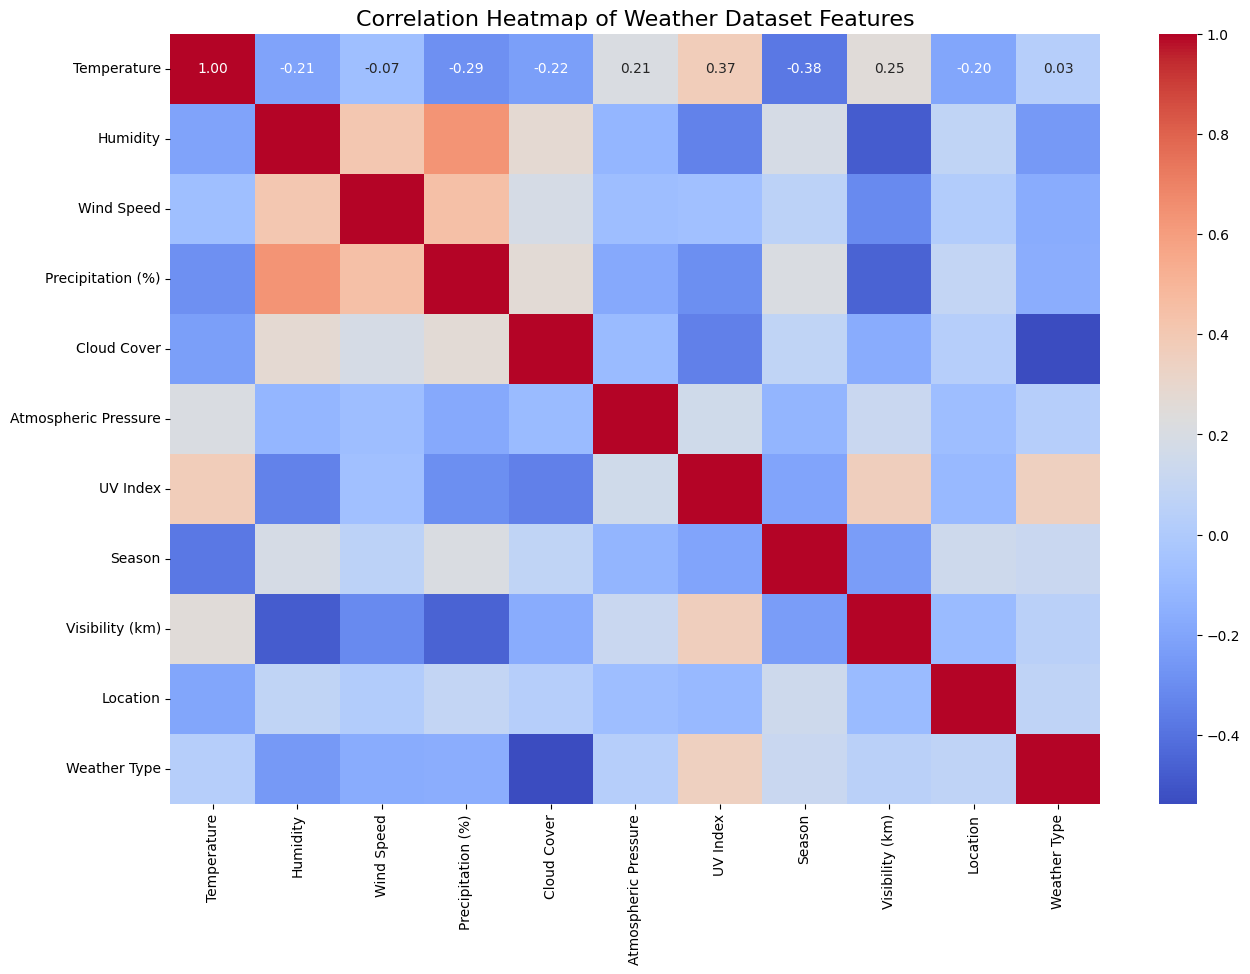

In [30]:
# Create the correlation heatmap with annotations
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr(numeric_only=True)   # safer with numeric_only
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  
plt.title('Correlation Heatmap of Weather Dataset Features', fontsize=16)
plt.show()

In [31]:
# storing the Dependent Variables in X and Independent Variable in Y
X=df.drop(['Weather Type'],axis=1)
y=df['Weather Type']

In [32]:
X

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0               14        73         9.5                 82            3   
1               39        96         8.5                 71            3   
2               30        64         7.0                 16            0   
3               38        83         1.5                 82            0   
4               27        74        17.0                 66            2   
...            ...       ...         ...                ...          ...   
13195           10        74        14.5                 71            2   
13196           -1        76         3.5                 23            1   
13197           30        77         5.5                 28            2   
13198            3        76        10.0                 94            2   
13199           -5        38         0.0                 92            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
0                   1010.82         2       3              3.5         1  
1                   1011.43         7       1             10.0         1  
2                   1018.72         5       1              5.5         2  
3                   1026.25         7       1              1.0         0  
4                    990.67         1       3              2.5         2  
...                     ...       ...     ...              ...       ...  
13195               1003.15         1       2              1.0         2  
13196               1067.23         1       3              6.0         0  
13197               1012.69         3       0              9.0         0  
13198                984.27         0       3              2.0         1  
13199               1015.37         5       0             10.0         2  

[13200 rows x 10 columns]

In [33]:
y

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int64

In [34]:
# split the data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=2)

In [35]:
# Initialize model
logreg = LogisticRegression()

# Train model
logreg.fit(X_train, y_train)

# Predictions
train_pred = logreg.predict(X_train)
test_pred  = logreg.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Test Accuracy: {:.2f}%".format(test_acc*100))

# ================= Analysis =================
if train_acc > test_acc + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc > train_acc + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 85.48%
Test Accuracy: 84.89%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       652
           1       0.84      0.84      0.84       706
           2       0.87      0.91      0.89       647
           3       0.85      0.84      0.85       635

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640



In [36]:
# Initialize model
dtree  = DecisionTreeClassifier()

# Train model
dtree.fit(X_train, y_train)

# Predictions
train_pred = dtree.predict(X_train)
test_pred  = dtree.predict(X_test)

# Accuracy
train_acc1 = accuracy_score(y_train, train_pred)
test_acc1  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc1*100))
print("Test Accuracy: {:.2f}%".format(test_acc1*100))

# ================= Analysis =================
if train_acc1 > test_acc1 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc1 > train_acc1 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 100.00%
Test Accuracy: 89.73%
⚠️ Model is Overfitting (high train accuracy, low test accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       652
           1       0.88      0.89      0.89       706
           2       0.93      0.92      0.92       647
           3       0.90      0.91      0.90       635

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [37]:
# Initialize model
rforest  = RandomForestClassifier()

# Train model
rforest.fit(X_train, y_train)

# Predictions
train_pred = rforest.predict(X_train)
test_pred  = rforest.predict(X_test)

# Accuracy
train_acc2 = accuracy_score(y_train, train_pred)
test_acc2  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc2*100))
print("Test Accuracy: {:.2f}%".format(test_acc2*100))

# ================= Analysis =================
if train_acc2 > test_acc2 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc2 > train_acc2 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 100.00%
Test Accuracy: 90.19%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       652
           1       0.91      0.91      0.91       706
           2       0.93      0.90      0.92       647
           3       0.90      0.90      0.90       635

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [38]:
# Initialize model
svc   = SVC()

# Train model
svc.fit(X_train, y_train)

# Predictions
train_pred = svc.predict(X_train)
test_pred  = svc.predict(X_test)

# Accuracy
train_acc3 = accuracy_score(y_train, train_pred)
test_acc3  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc3*100))
print("Test Accuracy: {:.2f}%".format(test_acc3*100))

# ================= Analysis =================
if train_acc3 > test_acc3 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc3 > train_acc3 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 82.63%
Test Accuracy: 82.61%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       652
           1       0.77      0.85      0.80       706
           2       0.86      0.93      0.90       647
           3       0.86      0.76      0.81       635

    accuracy                           0.83      2640
   macro avg       0.83      0.83      0.83      2640
weighted avg       0.83      0.83      0.83      2640



In [39]:
# Initialize model
knn   = KNeighborsClassifier()

# Train model
knn.fit(X_train, y_train)

# Predictions
train_pred = knn.predict(X_train)
test_pred  = knn.predict(X_test)

# Accuracy
train_acc4 = accuracy_score(y_train, train_pred)
test_acc4  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc4*100))
print("Test Accuracy: {:.2f}%".format(test_acc4*100))

# ================= Analysis =================
if train_acc4 > test_acc4 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc4 > train_acc4 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 92.65%
Test Accuracy: 88.03%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       652
           1       0.86      0.88      0.87       706
           2       0.93      0.91      0.92       647
           3       0.92      0.87      0.89       635

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



In [40]:
# Initialize model
gnb   = GaussianNB()

# Train model
gnb.fit(X_train, y_train)

# Predictions
train_pred = gnb.predict(X_train)
test_pred  = gnb.predict(X_test)

# Accuracy
train_acc5 = accuracy_score(y_train, train_pred)
test_acc5  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc5*100))
print("Test Accuracy: {:.2f}%".format(test_acc5*100))

# ================= Analysis =================
if train_acc5 > test_acc5 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc5 > train_acc5 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 86.12%
Test Accuracy: 85.64%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       652
           1       0.86      0.84      0.85       706
           2       0.92      0.90      0.91       647
           3       0.81      0.89      0.85       635

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640



In [41]:
# Initialize model
xgb   = XGBClassifier()

# Train model
xgb.fit(X_train, y_train)

# Predictions
train_pred = xgb.predict(X_train)
test_pred  = xgb.predict(X_test)

# Accuracy
train_acc6 = accuracy_score(y_train, train_pred)
test_acc6  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc6*100))
print("Test Accuracy: {:.2f}%".format(test_acc6*100))

# ================= Analysis =================
if train_acc6 > test_acc6 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc6 > train_acc6 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 100.00%
Test Accuracy: 90.00%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       652
           1       0.89      0.90      0.90       706
           2       0.93      0.90      0.92       647
           3       0.91      0.91      0.91       635

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [42]:
# Initialize model
gbc   = GradientBoostingClassifier()

# Train model
gbc.fit(X_train, y_train)

# Predictions
train_pred = gbc.predict(X_train)
test_pred  = gbc.predict(X_test)

# Accuracy
train_acc7 = accuracy_score(y_train, train_pred)
test_acc7  = accuracy_score(y_test, test_pred)

print("Training Accuracy: {:.2f}%".format(train_acc7*100))
print("Test Accuracy: {:.2f}%".format(test_acc7*100))

# ================= Analysis =================
if train_acc7 > test_acc7 + 0.1:   # 10% gap
    print("⚠️ Model is Overfitting (high train accuracy, low test accuracy)")
elif test_acc7 > train_acc7 + 0.05:
    print("ℹ️ Model may be Underfitting or Test set is easier than Train set")
else:
    print("✅ Model is Generalizing Well (train and test accuracy are close)")

# ================= Extra Reports =================
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Training Accuracy: 95.24%
Test Accuracy: 91.06%
✅ Model is Generalizing Well (train and test accuracy are close)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       652
           1       0.88      0.92      0.90       706
           2       0.92      0.92      0.92       647
           3       0.93      0.91      0.92       635

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [43]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression',  'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier',  'GaussianNB', 'XGBClassifier','GradientBoostingClassifier'],
    'Score' : [test_acc,  test_acc1, test_acc2, test_acc3, test_acc4, test_acc5,test_acc6,test_acc7]
})

models.sort_values(by = 'Score', ascending = False)

Model     Score
7  GradientBoostingClassifier  0.910606
2      RandomForestClassifier  0.901894
6               XGBClassifier  0.900000
1      DecisionTreeClassifier  0.897348
4        KNeighborsClassifier  0.880303
5                  GaussianNB  0.856439
0          LogisticRegression  0.848864
3                         SVC  0.826136

<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left">

<h3 style="font-size:185%; font-weight:bolder; color:grey">Results : </h3>

<span style="font-size:120%; font-weight:700; color:blue">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:blue">
<ul><b>GradientBoostingClassifier</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:green">So, We choose <mark> GradientBoostingClassifier </mark></span>
</div>

# LOC ROWS

In [44]:
df.loc[1000:1000:]


Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
1000           31        59        10.5                 33            3   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
1000               1000.41         3       3              7.5         0   

      Weather Type  
1000             0

# Making a Predictive System

In [45]:
input_data = (31, 59, 10.5, 33, 3, 1000.41, 3, 3, 7.5, 0)
              
# changing the input_data to numpy array
array_input = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input = array_input.reshape(1, -1)

# Use the model to make predictions
prediction = gbc.predict(reshaped_input)
predicted_class = prediction[0]

class_labels = {
    0: "Cloudy",
    1: "Rainy",
    2: "Snowy",
    3: "Sunny"
}

print("Predicted Class:", predicted_class)
print("Result:", class_labels.get(predicted_class, "Unknown Class"))

Predicted Class: 0
Result: Cloudy


# Saving the trained model

In [46]:
import pickle

In [47]:
filename = 'weather.sav'
pickle.dump(gbc, open(filename, 'wb'))

In [48]:
# loading the saved model
loaded_model = pickle.load(open('weather.sav', 'rb'))

# Loading the converted model

In [49]:
input_data = (31, 59, 10.5, 33, 3, 1000.41, 3, 3, 7.5, 0)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
predicted_class = prediction[0]

class_labels = {
    0: "Cloudy",
    1: "Rainy",
    2: "Snowy",
    3: "Sunny"
}

print("Predicted Class:", predicted_class)
print("Result:", class_labels.get(predicted_class, "Unknown Class"))

Predicted Class: 0
Result: Cloudy


In [50]:
for column in X.columns:
  print(column)

Temperature
Humidity
Wind Speed
Precipitation (%)
Cloud Cover
Atmospheric Pressure
UV Index
Season
Visibility (km)
Location


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
